## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#loading the csv file and storing it a the variable
ab_data = pd.read_csv(r"C:\DataSet\ab_data.csv")

#File structure
ab_data.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


Reading dataset, storing dataset in a variable and presenting the file structure. Only the first 5 lines contained in the file are listed.

b. Use the below cell to find the number of rows in the dataset.

In [3]:
#Returns the number of rows and columns
ab_data.shape

(294478, 5)

Showing the number of rows and columns contained in the dataset. The file has 294478 rows and 5 columns.

c. The number of unique users in the dataset.

In [4]:
#Returns the number of unique user_id contained in the dataset
#len(ab_data['user_id'].unique())
ab_data['user_id'].nunique()


290584

Returns the number of unique users (user_id field) contained in the dataset. The dataset has 290584 unique users.

d. The proportion of users converted.

In [5]:
#The proportion of users converted
ab_data['converted'].mean()

0.11965919355605512

Calculates the average of converted users, based on the converted column. On average 12% of users were converted.

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
pd.crosstab(ab_data.group, ab_data.landing_page, margins=True)

landing_page,new_page,old_page,All
group,,,
control,1928,145274,147202
treatment,145311,1965,147276
All,147239,147239,294478


In [7]:
#New_page and treatment may not align in two ways:
#  When: treatment and old_page
#    Or: control and new_page

treatment_oldPage = ab_data.query("group == 'treatment' and landing_page == 'old_page'").nunique()

control_newPage = ab_data.query("group == 'control' and landing_page == 'new_page'").nunique()

#print(treatment_oldPage + control_newPage)
treatment_oldPage + control_newPage

user_id         3893
timestamp       3893
group              2
landing_page       2
converted          4
dtype: int64

Analyzing the dataset, 1965 records were identified in which the "Treatment" group was associated with "landing_page" old_page. 1928 records were also identified in which the "Control" group was associated with "landing_page" new_page. Adding 3893 records that do not align.

f. Do any of the rows have missing values?

In [8]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Based on the information provided above, it can be seen that there are no missing values in the dataset. 294478 records for all columns.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#Creating a new dataset. In this dataset, the 3893 records in which they are not aligned are removed.
df2 = ab_data[((ab_data['group']=='treatment') & (ab_data['landing_page']=='new_page')) | 
              ((ab_data['group']=='control') & (ab_data['landing_page']=='old_page'))]

Creating a new dataset. In this dataset, the 3893 records in which they are not aligned are removed.

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

Analyzing the dataset after its creation.

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
#Returns the number of unique user_id contained in the new dataset
df2['user_id'].nunique()

290584

Returns the number of unique users (user_id field) contained in the new dataset (df2). The dataset has 290584 unique users.

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#Returns the user_id that contains duplicate records in the dataset
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

Analyzing the dataset, it is observed that user 773192 (user_id) has duplicate records in the data set.

c. What is the row information for the repeat **user_id**? 

In [13]:
#Returns rows containing duplicate user_id records in the data set
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


Displays the rows of the dataset that have the duplicated user_id

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#Removes duplicate lines contained in the dataset. By default, the first line will be kept.
df2 = df2.drop_duplicates(keep = 'first')

Removes duplicate lines contained in the dataset. By default, the first line will be kept.

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#Calculates the proportion of converted users
df2['converted'].mean()

0.11959667567149027

Returns the proportion of users converted based on the df2 dataset.

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#Returns the average of converted user, group Control
df2.query('group =="control"').converted.mean()

0.1203863045004612

Returns the average number of converted users belonging to the control group.

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
#Returns the average of converted user, group Control
df2.query('group =="treatment"').converted.mean()

0.11880724790277405

Returns the average number of converted users belonging to the treatment group.

d. What is the probability that an individual received the new page?

In [18]:
#Calculates the likelihood that a user will receive the new page
len(df2[df2['landing_page'] == 'new_page'])/len(df2)

0.5000636646764286

Returns the likelihood that a user will receive the new page.

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:** 

Observing the values obtained by the dataset analysis, it is observed that the Control group has a conversion rate of 12.03%, slightly higher than that of the Treatment group, which has a rate of 11.88%. The proportion of users converted, regardless of the page received, is 11.88%. Also according to the data provided by the dataset, it can be seen that a user has a 50% chance of receiving a new page.
Because the results present a very subtle difference, I believe that there is no difference, which is significant enough, to determine that a page will convert more users.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**
Null hypotheses: if the p-value is less than 5%, the old page has a greater chance of converting users.

Alternative hypotheses: if the p-value is equal to or greater than 5%, the new page has a greater chance of converting users.

H0: **$p_{old}$** ≥ **$p_{new}$**
 
H1:**$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
#Calculates user conversion rate
p_new = df2.converted.mean()
p_new

0.11959667567149027

Calculates the average number of converted users.

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
#Calculates user conversion rate
p_old = df2.converted.mean()
p_old

0.11959667567149027

Calculates the average number of converted users.

c. What is $n_{new}$?

In [21]:
#Returns the number of users who received the new page
n_new = len(df2.query('landing_page == "new_page"'))
n_new

145311

Number of users who received the new page.

d. What is $n_{old}$?

In [22]:
#Returns the number of users who received the old page
n_old = len(df2.query('landing_page == "old_page"'))
n_old

145274

Number of users who received the old page.

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
#Creates simulations based on p_new and n_new
new_page_converted = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])
new_page_converted.mean()

0.8803256463722636

Returns the average based on the simulations performed for users who received the new page.

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
#Creates simulations based on p_old and n_old
old_page_converted = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
old_page_converted.mean()

0.8796962980299297

Returns the average based on the simulations performed for users who received the old page.

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
#Calculates the difference between the averages calculated through simulation
new_page_converted.mean() - old_page_converted.mean()

0.0006293483423339685

Returns the difference between the averages calculated for the new page and the old page.

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
#10000 simulations
p_diffs = []
for _ in range(10000):
    #Returns a list of samples from a binomial distribution based on the inputted parameters n_new and p_new
    new_converted_simulation = np.random.binomial(n_new,p_new)/n_new
    #Returns a list of samples from a binomial distribution based on the inputted parameters n_old and p_old
    old_converted_simulation = np.random.binomial(n_old,p_old)/n_old
    #Returns the difference
    diff = new_converted_simulation - old_converted_simulation 
    #Stores calculations
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

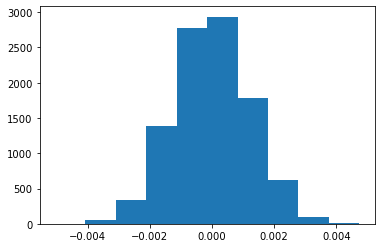

In [27]:
plt.hist(p_diffs);

Graphical representation of the simulations performed.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
#Returns the average number of converted users (based on the control group
orginal_old_mean = df2.query('group =="control"').converted.mean()
#Returns the average number of converted users based on the treatment group
orginal_new_mean = df2.query('group =="treatment"').converted.mean()
#Returns the difference
orginal_diff = orginal_new_mean - orginal_old_mean

#Convert p_diffs to array

p_diffs = np.array(p_diffs)

#Calculate the propotion of the p_diffs are greater than the actual difference observed in ab_data.csv
(p_diffs > orginal_diff).mean()

0.9009

Calculates the proportion of p_diffs greater than the actual difference observed in the original dataset (ab_data.csv)

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

In item j, the p_value was calculated. The p_value indicates a probability of observing a difference as large or greater than that observed under the null hypothesis.

The calculated p_value is greater than the 5% error rate, so we will not reject the null hypothesis and based on the results presented, the new page does not present great advantages in the number of users converted. Both pages perform almost similarly.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

#Returns the number of converted users who received the old page
convert_old = df2.query('landing_page == "old_page" & converted == "1"').count()[0]
#Returns the number of converted users who received the new page
convert_new = df2.query('landing_page == "new_page" & converted == "1"').count()[0]
#Counts the values
n_old = df2.landing_page.value_counts()[1]
n_new = df2.landing_page.value_counts()[0]
#Prints the calculated values
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145311)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
#Test for proportions based on normal (z) test
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
#Prints the calculated values
z_score, p_value

(1.3116075339133115, 0.905173705140591)

Print the calculated test statistic for the z-test and p-value for the z-test.

In [31]:
from scipy.stats import norm
#Returns the percentage of the normal distribution function that is less than or equal to the specified random variable
norm.cdf(z_score)

0.905173705140591

Percentage of distribution based test statistic for the z-test.

In [32]:
#Probability density function evaluated
norm.ppf(1-(0.05/2))

1.959963984540054

Probability density function evaluated

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**

The calculated value z_score is less than the critical confidence interval value (95%). 
Regarding the conversion rates of new and old pages, we found that the old page is only slightly better than the new one. Old page (17489/17264) and new page (145274/145311). Through conversion rates, you can see that the old page has better results than the new page.
These values, in principle, are in accordance with the results of hypothesis tests obtained in parts j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** 
For the scenario available in the dataset, logistic regression will be used

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
#Current dataset structure
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


Lists the current structure of the dataset df2.

In [34]:
#Ad a new column
df2['intercept']=1

#Print the dataset structure
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


Creates a new column called Intercept.

In [35]:
#Adds new columns based on the get_dummies function
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])

#Print the dataset structure
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
import statsmodels.api as sm
#Logit Model
logit = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
#Fit the model using maximum likelihood.
result = logit.fit()
#Print the summary
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:               8.085e-06
Time:                        13:44:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

Prints the summary of the regression performed.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**

The p_value associated with ab_page is equal to 0.190. This value differs from Part II because the test performed in Part II was based on the hypothesis that one of the pages has a higher conversion rate. While this test is concerned only if there is a difference between the conversion rates between the pages.

Given the scenario, a null hypothesis would be that the old page has the same conversion rate as the new page and the alternative hypothesis would be that the pages have different conversion rates.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**
Adding new factors to it could be a good option, as it would contribute to the realization of new tests and could lead to more specific decisions. However, it is important to note that the decrease in confidence intervals is not ruled out. Multiple factors in a logistic regression model can reduce the power of the analysis.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
#Reads a new file and creates a dataset
countries_df = pd.read_csv(r"C:\DataSet\countries.csv")
#Prints the number of records associated with each country
countries_df['country'].value_counts()


US    203619
UK     72466
CA     14499
Name: country, dtype: int64

Prints the number of records associated with each country based on the dataset countries.csv

In [39]:
#Adds the country associated with the user to the df2 dataset
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
#Print the dataset structure
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1


In [40]:
### Create the necessary dummy variables
#Adding columns from get_dummies
#The columns indicate which country the user is associated with
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
#Print the dataset structure
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
### Fit Your Linear Model And Obtain the Results
log_model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])
result2 = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [42]:
#Print the summary
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:               2.324e-05
Time:                        13:44:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

The addition of new columns did not significantly change the p_value associated with ab_page. With the addition of the new calculated p_value columns it is 0.191.
For calculation purposes, this change is not considered significant.

In [43]:
df_new['ab_pag_US'] = df_new['ab_page'] * df_new['US']
df_new['ab_pag_UK'] = df_new['ab_page'] * df_new['UK']

final_model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US', 'ab_pag_US', 'ab_pag_UK']])

result3 = final_model.fit()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


In [44]:
#Print the summary
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:               3.483e-05
Time:                        13:44:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_pag_US      0.0469      0.054      0.872      0.383      -0.059       0.152
ab_pag_UK      0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

Checking the presented summary, the values provided for the p_value are below the levels of significance (significance level of 0.05). Indicated that we do not reject the null hypothesis.
It can also be observed that there is no interaction between the country and the page received that may or may not predict the conversion of a user.

<a id='conclusions'></a>
## Conclusions

The methods used point out that in this scenario we cannot disregard the null hypothesis.
Evidence does not show that the new page has a better user conversion rate than the old page.
In view of the presented scenario, it is observed that the costs associated with the development of a new page can be much higher than the expected result with the increase in the conversion rate.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.